# Data Fundamentals (H)
John H. Williamson / Sebastian Stein -- Session 2023/2024

----

**This submission must be your own work; you will have to make a Declaration of Originality on submission.**

---

# Lab 2: **Assessed**
## Numerical arrays and vectorized computation


### Notes
It is recommended to keep the lecture notes open while doing this lab exercise.

**This exercise is assessed**. Make sure you upload your solution by the deadline. Submit only the `.ipynb` file.

<div class="alert alert-warning">
    
    
### Hints

There is a [hint sheet](tensors_hints.ipynb) for this lab. **Attempt the questions without using the hint sheet; if you get stuck, then look at the hints.**
    
</div>

### References
If you are stuck, the following resources are helpful:

* [NumPy cheatsheet](https://github.com/juliangaal/python-cheat-sheet/blob/master/NumPy)
* [NumPy API reference](https://docs.scipy.org/doc/numpy-1.13.0/reference/)
* [NumPy user guide](https://docs.scipy.org/doc/numpy-1.13.0/user/basics.html)

* [Python for Data Science cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/PythonForDataScience.pdf)
* [Another NumPy Cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Numpy_Python_Cheat_Sheet.pdf)




## Purpose of this lab
This lab should help you:
* understand floating point representations
* understand how roundoff errors occur and how you can control them
* understand how to do simple operations in a vectorised manner
* work with higher rank tensors, selecting the attributes you want to work with


Note: this lab requires solving puzzles which require that you understand the course material. Very little code is required to get the correct solutions.
You *may* use loops in Parts 1 and 2; you must exclusively use vectorised operations in Part 3 + Part 4.


In [1]:
import sys, os
python_path = sys.executable

## custom utils
## uncomment and run the line below ONCE if you get an error about jhwutils
## then RESTART THE KERNEL (Kernel/Restart)
## the `import os` line must be used if in the lab; but it won't work if outside!
# import os; os.environ["http_proxy"] = "http://wwwcache.gla.ac.uk:8080"
# !{python_path} -m pip --no-cache install --user -U https://github.com/johnhw/jhwutils/zipball/master

# comment this line again before submitting!

In [2]:
# Standard imports
# Make sure you run this cell!
# NumPy
import numpy as np  
np.set_printoptions(suppress=True)

# Set up Matplotlib
import matplotlib as mpl   
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize=(8.0, 4.0), dpi=140)

from jhwutils.checkarr import array_hash, check_hash
from jhwutils.float_inspector import print_float_html
from jhwutils.vector_checks import check_is_vectorised
import jhwutils.image_audio as ia
import jhwutils.tick as tick
import binascii

def case_crc(s):
    h_crc = binascii.crc32(bytes(s.lower(), "ascii"))
    print(f"0x{h_crc:08x}")
    return h_crc

def list_crc(l):
    return case_crc(str(l))

def strict_array_hash(arr):
    ix = np.meshgrid(*[np.arange(i) for i in arr.shape], indexing="ij")
    h = array_hash(np.mean([i*arr for i in ix], axis=0))
    print(h)
    return h

import lzma, base64
exec(lzma.decompress(base64.b64decode(b'/Td6WFoAAATm1rRGAgAhARYAAAB0L+Wj4AKSAVBdAAUaCmNWCuiTCXe8bHWT/WeqghymfBRQKyklXJ3lgDWHk34myezvldkgSu3Adiur0vA+OkDfUwiMWzEclOxunCssCtgpWpQMTwtylLQC9aX0APwnuNk2VBPkVpt3pZsFKs0BMyRTuhrg0V/Xx6bM+Bn1nFyNXcypfmjxbXjoi9BMKtAPcoUEcdDEem5mlPC6l+muDcPz43g11Avn/dn69ADhuA8mTOK+r1zMgsO23x/6JLKGZKXp76wYb1gJTmVk2SQ0TJgkbCb5uHsoT42wPaYRpu/I+3tfZ5li4brzvMpA1/uvSdPxkSBTqxx5qXIiMRWnPqxEyqQ6qNxU7A9znfx5WRm4OIT0Q6gUkot60cVFJDMqH1aXLyHakpArv/O0LZaLOHb8MQK0UY0C2WqQJwgOCEfqEuAr2RwvU3PqAMwC6LqhYIFBRFqVH4ESeISgAAA2Mcm1UUpA8QAB7AKTBQAA5dAtcbHEZ/sCAAAAAARZWg==')))
np.set_printoptions(precision=30)
print("Everything imported OK")

Everything imported OK


## Precision
Want to change precsion of number printing in NumPy?

* `np.set_printoptions(precision=30)` will show the numbers in full
* `np.set_printoptions(precision=3)` will show three decimal places, etc.


## 1. Fake floats

<img src="imgs/particles.webp" width="50%">

You are asked to help fix a scientific instrument in a particle accelerator. There are two types of sensors in use, both storing accumulated energy in an experiment (in microelectronvolts, ueV):

* **Markon VQ3**; which internally uses `float32` 
* **Allan Versai T12-9**; which internally uses `float64` 

You have a file containing batches of data from these sensors. Each batch contains measurements only from one sensor type. You urgently need to know which sensors were used for which batches.

Unfortunately there are complications:
- the batches are in an unknown order.
- the data format used to store the results on disk is `uint64` (i.e. unsigned 64 bit *integers*). Energy levels are rounded down to the nearest integer and stored in a file.
- saboteurs ideologically opposed to discovery of the Higgs boson have inserted fake batches that don't come from either sensor.

Work out which sensor was used for which batch, storing the results in lists `markon`, `allan` and `fake`. The lists should contain the indices (in order) of the batches from that sensor (e.g. `markon = [0, 4, 9, 11]`).

Note: you don't need to solve all of this in a vectorised way; loops are fine if they are appropriate.


In [3]:
# YOUR CODE HERE

batches = np.load("data/data_batches.npy")
# print(batches.shape, batches.dtype)

markon = []
allan = []
fake = []

for i, data_batch in enumerate(batches):
        float32 = np.float32(data_batch)
        float64 = np.float64(data_batch)
        if np.all(np.uint64(float32) == data_batch):
            markon.append(i)
        elif np.all(np.uint64(float64) == data_batch):
            allan.append(i)
        else:
            fake.append(i)

print(markon)
print(allan)
print(fake)
# YOUR CODE HERE

[0, 4, 6, 9, 11, 12]
[3, 5, 7, 8, 13, 15]
[1, 2, 10, 14]


In [4]:
## Tests        
with tick.marks(3):
    assert list_crc(markon)==0x1a6223db

0x1a6223db


In [5]:
with tick.marks(3):
    assert list_crc(allan)==0x2781b194

0x2781b194


In [6]:
with tick.marks(3):
    assert list_crc(fake)==0x2c41703e

0x2c41703e


# 2. Financial misconduct

You have been asked to verify the computation of some financial predictive models. These models produces a sequence of updates to the value of a product. The product updates are mainly of two types:
* **large deposits**, representing inflows of new cash, often up into the billions of pounds
* **small returns** from high-frequency trading activity

The simulator produces **two** model outputs from two distinct models `a` and `b` at each time step, which provide very similar estimates of the value of these updates. Sometimes these are equal to each other.


You are asked to write code that will produce:

* an estimate of the total value of a product over some series
* the total difference between two different product models, both of which are very similar.

You are given the existing code below, which is supposed to compute and return:

* the sum of the `a` updates (i.e. total value of `a`)
* the accumulated difference between the `a` and `b` products.

However, the result is very inaccurate when tested. Modify this code to be more accurate. Do NOT use NumPy, or *any* other external module to improve your calculation. Use floating point, regardless of the fact that floating point is not appropriate for financial data.

<div class="alert alert-danger">
    
You have no access to the `simulate()` function. It calls your code with values for `a` and `b`, but you cannot its source code or see how it works internally. 
</div>


The errors should be less than 0.5 for the `a` sum and less than 1e-10 for the difference in predictions.

In [7]:
class Simulator: # we use a class just to hold variables between calls
    def __init__(self):
        # initialise accumulators
        self.a_sum = 0
        self.b_sum = 0
        
    def update(self, a, b):
        # increment
        self.a_sum += a
        self.b_sum += b
       
    def results(self):
        # return a  pair of results
        return self.a_sum, self.a_sum - self.b_sum
        

In [8]:
a_error, d_error = simulate(Simulator())
# bad result!
print(f"Error in a_sum is {a_error} and {d_error} in d_sum")

Error in a_sum is 8.0078125 and 4.97764360626843 in d_sum


Copy and paste the `Simulator` into the cell below and modify it:

In [9]:
# YOUR CODE HERE
class Simulator: # we use a class just to hold variables between calls
    def __init__(self):
        # initialise accumulators
        self.a_sum = 0
        self.b_sum = 0
        
        self.a_large = 0
        self.a_small = 0
        
        self.b_diff = 0
                      
    def update(self, a, b):
        # increment
        
        if (a > 10):
            self.a_large += a
        else:
            self.a_small += a
        
        self.b_diff += (a - b)
       
    def results(self):
        self.a_sum = self.a_large + self.a_small
        
        # return a  pair of results
        return self.a_sum, self.b_diff

In [10]:
    
a_error, d_error = simulate(Simulator())
print(f"Error in a_sum is {a_error} and {d_error} in d_sum")

Error in a_sum is 0.015625 and 2.2737367544323206e-11 in d_sum


In [11]:
with tick.marks(2):
    assert(a_error<2.0)

In [12]:
with tick.marks(2):
    assert(a_error<0.5)

In [13]:
with tick.marks(2):
    assert(d_error<1e-6)

In [14]:
with tick.marks(2):
    assert(d_error<5e-11)

# 3. Vectorised operations

<div class="alert alert-danger">
    
**From this point on, no more `for` or `while` loops! Use only vectorised computations.**
    
</div> 

In each of the examples below, you're given some code that does not use NumPy. Rewrite the code, without using `for`, `while`, list comprehensions, or any other form of Python iteration or recursion. Vectorise the code, and return the same array as the original code. **The first one is done for you.**

All of the vectorised versions could be done one short line.


In [15]:
def f(x):
    a = []
    b = []
    for i in range(x):
        a.append(i**2)
    for i in range(1, x):
        b.append(a[i]-a[i-1])        
    return b

In [16]:
# this one is already done for you...
def vec_f(x):
    return np.diff(np.arange(x)**2)

In [17]:
with tick.marks(0):
    assert check_is_vectorised(f, vec_f, 1)
    assert check_is_vectorised(f, vec_f, 0)
    assert check_is_vectorised(f, vec_f, 10)
    assert check_is_vectorised(f, vec_f, 103)
    

In [18]:
def g(x):
    k = 0 
    y = []
    z = []
    for i in range(len(x)):        
        k += x[i] * 5
        y.append(k)
    for i in range(len(x)):
        if i%3==0:
            z.append(y[i])
    return z  

print(g([1, 3, 10]))

[5]


In [19]:
# YOUR CODE HERE
def vec_g(x):
    y = np.cumsum(x * 5)
    z = y[::3]
    return z

In [20]:
with tick.marks(4):
    assert check_is_vectorised(g, vec_g, np.arange(10))
    assert check_is_vectorised(g, vec_g, np.arange(10)**2)
    assert check_is_vectorised(g, vec_g, np.arange(3)+1)
    

In [21]:
def h(x, y):
    l = []
    k = 0
    for i in range(len(x)):
        k += x[i]
        p = x[i] * y[i] + k        
        if y[i]!=0:
            l.append(p)
    return np.array(l)

print(h([1,2,3], [4,5,6]))

[ 5 13 24]


In [22]:
# YOUR CODE HERE
def vec_h(x, y):
    k = np.cumsum(x)
    p = x * y + k
    check = (y != 0)
    return p[check]

x = np.array([1,2,3])
y = np.array([4,5,6])

print(vec_h(x, y))

[ 5 13 24]


In [23]:
with tick.marks(4):
    assert check_is_vectorised(h, vec_h, np.arange(5), np.arange(5)-3)
    assert check_is_vectorised(h, vec_h, np.arange(5), np.arange(5)+3)
    assert check_is_vectorised(h, vec_h, np.arange(9)/10.0, np.arange(9)-3)

In [24]:
def a(x, y):
    z = []
    for i in range(len(x)):        
        if y[i]<0:
            z.append(np.cos(x[i])*y[i])
        else:
            z.append(np.sin(x[i])*y[i])
    return np.array(z)

print(a([2], [1]))

[0.9092974268256817]


In [25]:
# YOUR CODE HERE
def vec_a(x, y):
    z = np.where(y < 0, np.cos(x) * y, np.sin(x) * y)
    return np.array(z)

print(vec_a(2, 1))

0.9092974268256817


In [26]:
with tick.marks(4):
    assert check_is_vectorised(a, vec_a, np.arange(5), np.arange(5)-3)
    assert check_is_vectorised(a, vec_a, np.arange(5), np.arange(5)+3)
    assert check_is_vectorised(a, vec_a, np.arange(9)/10.0, np.arange(9)/3)

In [27]:
def b(x):
    l = []
    for i in range(x.shape[1]):
        sum = 0
        for j in range(x.shape[0]):
            sum += x[j,i]
        l.append(sum / x.shape[0])        
    min_x = np.inf
    min_ix = 0
    for i in range(x.shape[1]):
        if l[i]<min_x:
            min_x = l[i]
            min_ix = i    
    return min_ix     

In [28]:
# YOUR CODE HERE
def vec_b(x):
    col_sum = x.sum(axis=0)
    col_mean = col_sum / x.shape[0]
    min_ix = np.argmin(col_mean)
    return min_ix

In [29]:
with tick.marks(4):
    np.random.seed(2022)
    assert check_is_vectorised(b, vec_b, np.random.uniform(0, 1, (3,3)))
    assert check_is_vectorised(b, vec_b, np.random.uniform(0, 1, (4,5)))
    assert check_is_vectorised(b, vec_b, np.random.uniform(-10, 10, (11, 19)))    
    

In [30]:
# hint: think promotion...
def c(x, y, z):
    q = np.zeros((len(x), len(y)))
    for i in range(len(x)):
        for j in range(len(y)):            
                if x[i]-y[j]<1:
                    q[i,j] = z[i,j]
                else:
                    q[i,j] = x[i] * y[j] - z[i,j]
                    
    
    return q


In [31]:
def vec_c(x, y, z):
    x1 = np.tile(x, (1,1))
    y1 = np.tile(y, (1,1))
    return np.where(x1-y1<1, z, x1*y1-z)    

In [32]:
# YOUR CODE HERE
    

In [33]:
with tick.marks(4):    
    np.random.seed(2022)
    x = np.random.uniform(0, 1, 7)
    y = np.random.uniform(0, 1, 7)
    z = np.random.uniform(0, 1, (7,7))
    assert check_is_vectorised(c, vec_c, x, y, z)
    
    

In [34]:
def d(x,y):
    z = np.zeros((len(x), len(y)))
    
    for i in range(len(x)):
        for j in range(len(y)):
            z[i,j] = x[i] * y[j]
            
    for i in range(len(x)):
        for j in range(len(y)):
            z[i,j] -= x[len(x)-i-1] * y[len(y)-j-1]            
            
    return z
                 

In [35]:
# YOUR CODE HERE
def vec_d(x, y):
    z = np.outer(x, y)
    return z - np.outer(x[::-1], y[::-1])

x = [1, 2, 3, 4]
y = [1,2,3,4]
print(vec_d(x, y))

[[-15 -10  -5   0]
 [-10  -5   0   5]
 [ -5   0   5  10]
 [  0   5  10  15]]


In [36]:
with tick.marks(4):
    assert check_is_vectorised(d, vec_d, np.arange(10), np.arange(10))
    assert check_is_vectorised(d, vec_d, np.arange(3), np.arange(10))
    assert check_is_vectorised(d, vec_d, np.arange(10)-2, np.arange(12)+1)
    
    

# 4. Working with tensors 
The file `data/sprite_sheet_2023.png` contains a number of "sprites" (small images) for use in a game. 

Each sprite is a 48x48 colour image.

These images are from the [DawnLike tile set by DragonDePlatino](https://opengameart.org/content/dawnlike-16x16-universal-rogue-like-tileset-v181) [CC-BY-4.0]

We can look at the whole spritesheet -- it's just a big image.

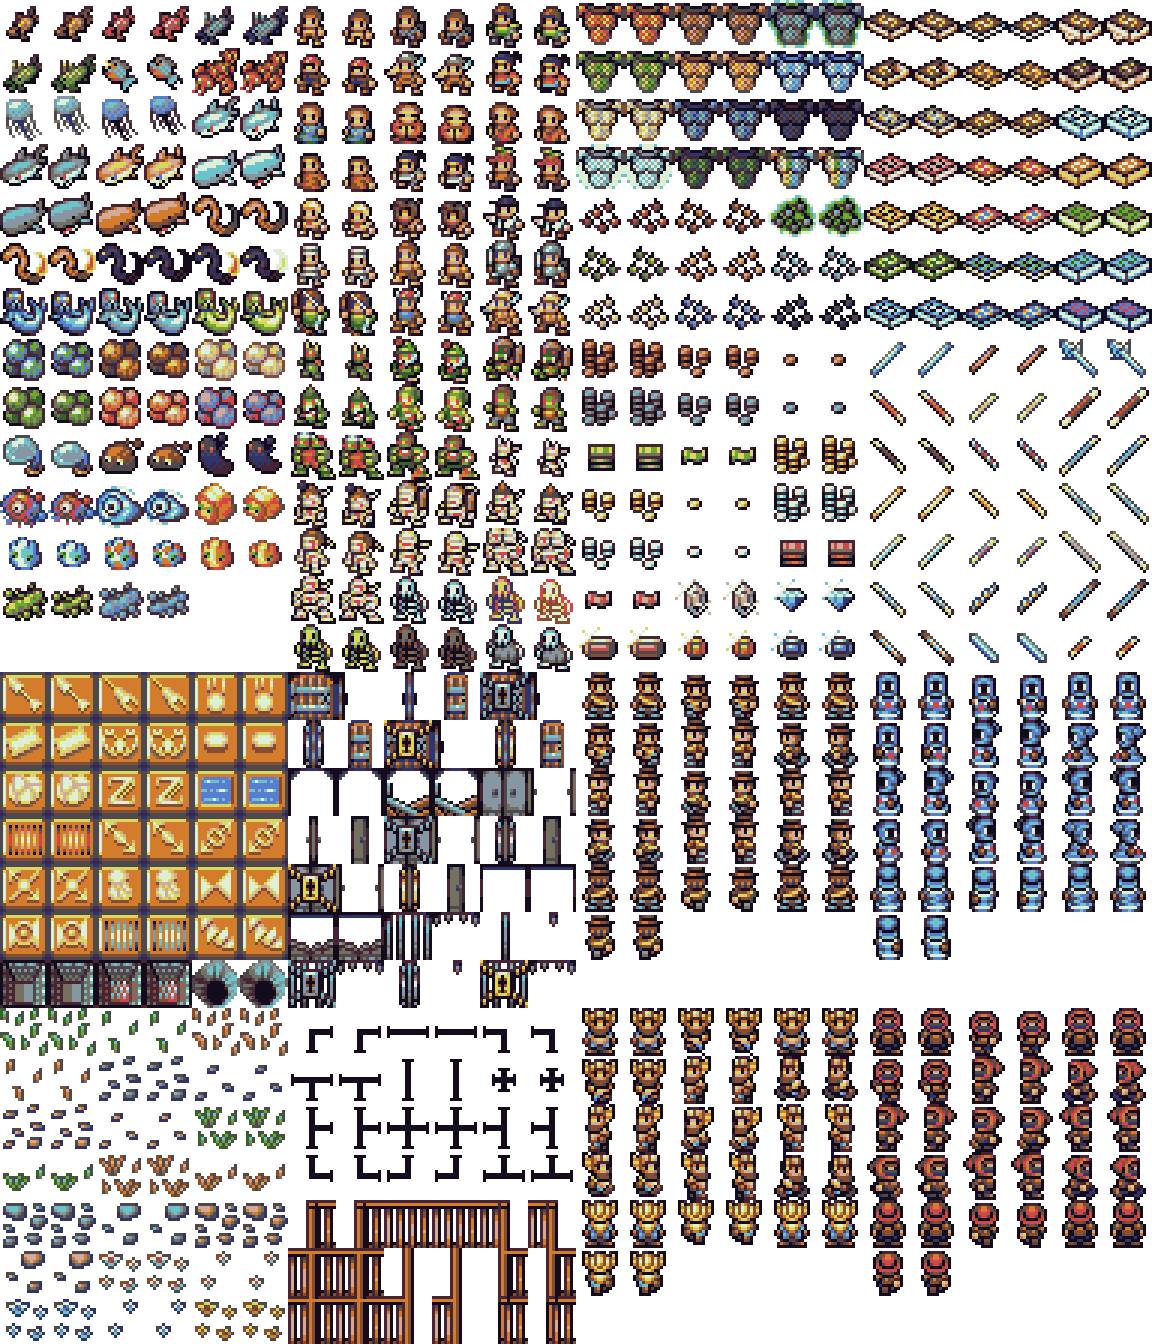

(1344, 1152, 4)


In [37]:
sheet = ia.load_image_colour("data/sprite_sheet_2023.png")
ia.show_image(sheet, width="50%")
print(sheet.shape)

The spritesheet is organised in a very particular way. It is divided into sixteen groups. The layout of these groups is shown below. There are exactly equal numbers of sprites in each group. Each sprite is a 48x48 block of pixels, with four colour channels (R,G,B,A).

<img src="imgs/sheet_map_1.png" width="70%">

Each sprite in a group has two **animation frames**; these are stored side-by-side (left to right) in the sprite sheet. For example, we could show the animation for the first sprite like this:

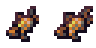

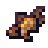

In [38]:
ia.show_image(sheet[:48, :96], width="10%") # show first two sprites using slicing
# these are two animation frames; we can stack them 
# to show them as a gif
frame_0 = sheet[:48, :48] # top-left sprite
frame_1 = sheet[:48, 48:96] # next sprite to right
ia.show_gif(np.stack([frame_0, frame_1]), width="5%") # angry crab

# Tasks
## A: Rearrange
Rearrange the sprite sheet image into a tensor called `group_sheet` that is ordered like this:

        (frames, colors, group_row, group_col, group_i, group_j, rows, cols)
        
where `group_row` and `group_col` represent the position of the sprite group in the range (0-4) (e.g. [0,0] would be `aquatic`, [0,2] would be `armor`, [1,1] would be `undead`), and `group_i` and `group_j` represent the index of the sprite within that group (e.g. [0,0] would reference the top left sprite inside the specified group). 



In [39]:
# YOUR CODE HERE
frames = 2
colors = 4

group_row = 4
group_col = 4

group_i = 3
group_j = 7

rows = 48
cols = 48

# a - group_row
# b - group_j
# c - rows
# d - group_col
# e - group_i
# f - frames
# g - cols
# h - colors
group_reshaped = sheet.reshape(group_row, group_j, rows, group_col, group_i, frames, cols, colors)
# print(group_reshaped)
group_sheet = np.einsum('abcdefgh -> fhadbecg', group_reshaped)

# print(group_reshaped)

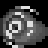

In [40]:
# if your code worked, you should see a monochrome "blob" below
ia.show_image(group_sheet[0,0,1,0,3,1], width="10%")

In [41]:
# test shape is correct
with tick.marks(6):        
    
    assert(check_hash(group_sheet.shape, ((8,), 899.0984292547843)))

In [42]:
# test content is ok
with tick.marks(6):                
    assert(np.allclose(array_hash(group_sheet)[1], 4651699986199.503, atol=1e-2, rtol=1e-2))    
    assert(np.allclose(strict_array_hash(group_sheet)[1], 33021508739541.367, atol=1e-2, rtol=1e-2))

((2, 4, 4, 4, 7, 3, 48, 48), 33021508739541.367)


# B. Sample image
Create an array `sample_image` which includes the *second* of the two animation frames in the uninterlaced `group_sheet` for the third sprite from each group (i.e. the first row, third column of each group), arranged as a single long strip, running left to right. It should be a (48,768,4) array. 
Don't use a loop! Use `einsum` and `reshape`.

It should look like this:
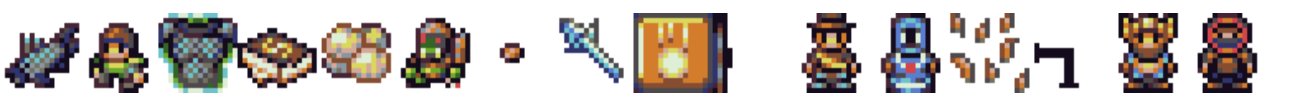

In [43]:
# YOUR CODE HERE
position_arr = group_sheet[1, :, :, :, 0, 2, :, :]
print(position_arr.shape)

pix_reorder = np.einsum('abcde -> abced', position_arr)
print(pix_reorder.shape)

col_reorder = pix_reorder.reshape(4, 768, 48)
print(col_reorder.shape)

sample_image = np.einsum('abc -> cba', col_reorder)     #((48,768,4))
print(sample_image.shape)


(4, 4, 4, 48, 48)
(4, 4, 4, 48, 48)
(4, 768, 48)
(48, 768, 4)


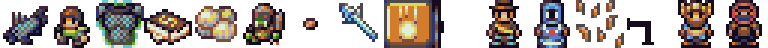

In [44]:
ia.show_image(sample_image)

In [45]:
with tick.marks(4):
    assert(check_hash(sample_image, ((48, 768, 4), 2854937692.299833 )))
    assert(np.allclose(strict_array_hash(sample_image)[1], 372498642324.58246, atol=1e-2, rtol=1e-2))

((48, 768, 4), 372498642324.58246)


## C Areas
### 1. Finding areas
The "area" of a sprite is the count of non-zero alpha channel pixels (counted across all animation frames). Sprites with larger area take more compute to draw onto screen. Find the money sprites in `group_sheet` with smallest and largest area, and store them in `largest_money` and `smallest_money`. These should be arranged into `(2,48,48,4)` arrays `(frames, rows, cols, rgba)`

In [46]:
# YOUR CODE HERE
group_money = group_sheet[:, 3, 1, 2, :, :, :, :]

areas = np.sum(group_money > 0, axis = (0, -1, -2))

min_i = np.unravel_index(np.argmin(areas), areas.shape)
max_i = np.unravel_index(np.argmax(areas), areas.shape)

smallest_money = group_sheet[:, :, 1, 2, min_i[0], min_i[1]]
smallest_money = np.einsum('abcd -> acdb', smallest_money)

largest_money = group_sheet[:, :, 1, 2, max_i[0], max_i[1]]
largest_money = np.einsum('abcd -> acdb', largest_money)



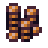

In [47]:
ia.show_gif(largest_money, width="5%") # big stacks o'cash

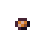

In [48]:
ia.show_gif(smallest_money, width="5%") # one sad coin

In [49]:
with tick.marks(4):
    assert(check_hash(largest_money, ((2, 48, 48, 4), 36513717.11430106 )))
    assert(np.allclose(strict_array_hash(largest_money)[1], 449685676.3868211, atol=1e-2, rtol=1e-2))

((2, 48, 48, 4), 449685676.3868211)


In [50]:
with tick.marks(4):
    assert(check_hash(smallest_money, ((2, 48, 48, 4), 5011646.094650576)))
    assert(np.allclose(strict_array_hash(smallest_money)[1], 60074391.034250475, atol=1e-2, rtol=1e-2))

((2, 48, 48, 4), 60074391.034250475)


### 2. Area map
The developers are keen to compute a "map" of the area of each sprite to visualise how large each one is. Generate an array of size (28, 12) that 
is the area of each sprite (again, remembering that the area sums over all animation frames for a sprite). The layout should be ordered *as in the original sprite map `sheet`*. The result should look like this:
<img src="imgs/area_map.png">


In [51]:
# YOUR CODE HERE
sprites_color = group_sheet[:, 3, :, :, :, :, :, :]
areas = np.sum(sprites_color > 0, axis=(0, -1, -2))
area_map = np.einsum('abcd -> acbd', areas).reshape(28, 12)

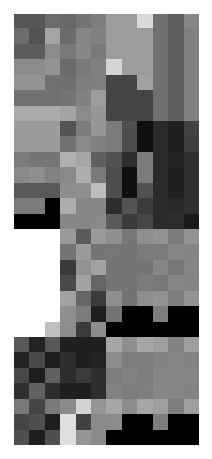

In [52]:
ia.show_image_mpl(area_map/4608) 
# a sprite covers 96x48 pixels (two 48x48 frames)
# so 4608 = 96*48 is the maximum possible coverage

In [53]:
with tick.marks(6):
    assert(check_hash(area_map, ((28, 12), 109298960.7673283 )))
    assert(np.allclose(strict_array_hash(area_map)[1], 1233668181.0344813, atol=1e-2, rtol=1e-2))
    

((28, 12), 1233668181.0344813)


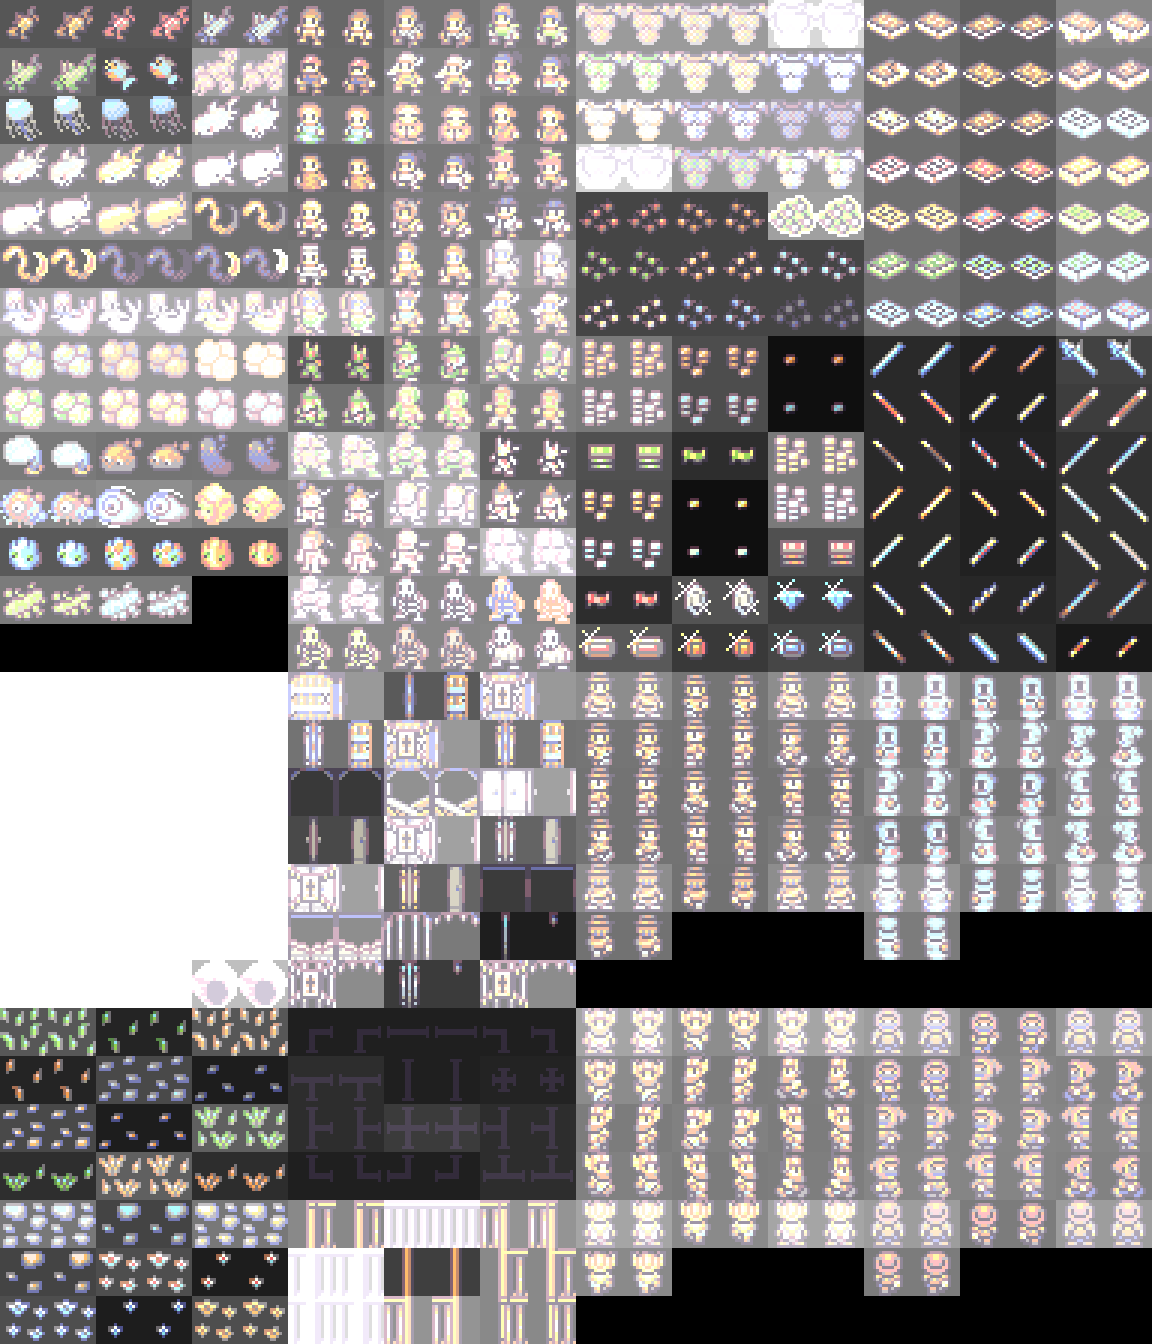

In [54]:
# show the colouring overlaid; bright colours are high area sprites, dark are low area
ia.show_image((sheet[:,:,:3].T + np.repeat(np.repeat(area_map/4608, 48,axis=0), 96, axis=1).T).T)

## D Pixel masks

From `group_sheet`, you are asked to find *row masks* for each sprite. 
* A row  mask is an image where each pixel is either 1 or 0; the pixel will be 0 if there is an all-zero row on *both* of the original sprite frames on the alpha channel (colour channel 3). 
* This implies nothing needs to be drawn at all on this row, and it can be skipped when rendering.
* A row mask for a single sprite would be a (48, 48) image (no colour channels; it's just 0s and 1s). Every column is equal.
* The mask will be 1 everywhere,
except on pixels `[r,c]` where there are no "on" pixels in the original sprite on row `r`.

The graphics team want this as a (336, 48, 48) array called `mask_sprites`. 

In [55]:
# YOUR CODE HERE
sprites_color = group_sheet[:, 3, :, :, :, :, :, :]
row_masks = np.any(sprites_color, axis=(-1, 0))
mask_sprites = np.repeat(row_masks, 48, axis = -1)
mask_sprites = mask_sprites.reshape(-1, 48, 48)
print(mask_sprites.shape)

(336, 48, 48)


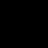

In [56]:
# show all the masks as an animation
ia.show_gif(mask_sprites, width="10%")

In [57]:
with tick.marks(4):
    assert(check_hash(mask_sprites.astype(np.float64), ((336, 48, 48), 235591825467.20084)))

## E: Rearrange and interlace

The graphics team have decided they'd prefer to index sprites differently. 

They have come up with a different organisation, which is divided into four **categories** (monster, item, dungeon, player), and each category is divided into four groups (again giving sixteen groups total). The arrangement is shown below:

<img src="imgs/sheet_map_2.png">

They would like to give a sprite category (0-4), a sprite group (0-4) and a sprite index (0-21) and get back the (2,48,48,4) sprite image. The category and group counts should index top-to-bottom, left-to right (so category 0=`Monster`, category 1=`Item`, category 2=`Dungeon`, category 3=`Player`, and similarly for groups).

They also need to deal with an *interlaced* display, where only half of the rows are displayed on screen at any one time; the next half are shown in the next frame [this was common in the days of CRT displays]. 

To make this look smooth, they need to:
- 0: display the even rows of animation frame 0
- 1: display the even rows of animation frame 1
- 2: display the odd rows of animation frame 0
- 3: display the odd rows of animation frame 1

The array needs to be arranged so that these four interlaced frames can be indexed directly (0-3).

Create the array `flat_sheet` with indices `[category, group, index, interlaced_frames, rows, cols, channels]`. 



In [58]:
# YOUR CODE HERE
flat_sheet = np.reshape(group_sheet, (4, 4, 21, 2, 48, 48, 4))

If this worked, you should see a sequence of ten animated "undead" (category 0, group 3) sprites when you run the cell below:

In [59]:
undead = flat_sheet[0,3] 
def deinterlace(sprite):
    x = np.zeros((sprite.shape[0], sprite.shape[1]*2, sprite.shape[2], sprite.shape[3]))
    x[0, ::2] = sprite[0]
    x[1, 1::2] = sprite[1]
    x[2, ::2] = sprite[2]
    x[3, 1::2] = sprite[3]
    x[:,:,:,3] = 1
    return x

for i in range(10):
    ia.show_gif(deinterlace(undead[i]), width="8%")

IndexError: index 2 is out of bounds for axis 0 with size 2

In [ ]:
# test shape is correct
with tick.marks(6):        
    assert(check_hash(flat_sheet.shape, ((7,), 614.09888943328)))

In [ ]:
# test content is unchanged
with tick.marks(3):        
    assert(np.allclose(array_hash(flat_sheet)[1], 4010340038338.4336, atol=1e-2, rtol=1e-2))   
    assert(np.allclose(strict_array_hash(flat_sheet)[1], 29369769161939.5086, atol=1e-2, rtol=1e-2))   
    

# END OF LAB

-----

# Submission instructions

## Before submission

* Make sure you fill in any place that says `YOUR CODE HERE` or `"YOUR ANSWER HERE"`.
* SAVE THE NOTEBOOK
* DO NOT RENAME THE NOTEBOOK OR IT WILL NOT BE MARKED.

<div class="alert alert-block alert-danger">
    
### Formatting the submission
* **WARNING**: If you do not submit the correct file, you will not get any marks.
* Submit this file **only** on Moodle. It will be named `<xxx>.ipynb`.

</div>


## Penalties (only for assessed labs)
<font color="red">
    
**Malformatted submissions**
</font>
These assignments are processed with an automatic tool; failure to follow instructions *precisely* will lead to you automatically losing two bands in grade regardless of whether the work is correct (not to mention a long delay in getting your work back). **If you submit a file without your work in it, it will be marked and you will get 0 marks.**

<font color="red">**Late submission**</font>
Be aware that there is a two band penalty for every *day* of late submission, starting the moment of the deadline.

<font color="red">
    
**Plagiarism**
</font> Plagiarism will be subject to the Plagiarism Policy. The penalties are severe.